In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load cleaned data
df = pd.read_csv("/Users/peizheng/Downloads/UCB_Coding/Fall_Adavanced_Computing/final-project-repo-group-2/data/cleaned_joined_data.csv")

df.head()

,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,rating_number,features,description,price,images_y,videos,store,categories,details,bought_together
0,5.0,Pretty locket,I think this locket is really pretty. The insi...,[],B00LOPVX74,B00LOPVX74,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,1578528394489,3,True,...,137,['STAMPED 925 STERLING SILVER - This high qual...,"[""This beautiful jewelry would be a great addi...",30.00,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Irish Locket Celtic Locket Necklac...,CHUVORA,[],"{'Is Discontinued By Manufacturer': 'No', 'Pro...",NaN
1,5.0,A,Great,[],B07B4JXK8D,B07B4JXK8D,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1608426246701,0,True,...,3096,['Cozy Slipper Socks For Men; Bariatric Slippe...,"[""Anyone looking for the best in single tread ...",20.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],PrimeMed,[],"{'Is Discontinued By Manufacturer': 'No', 'Pac...",NaN
2,5.0,I LOVE these glasses,I LOVE these glasses! They fit perfectly over...,[],B00PKRFU4O,B00XESJTDE,AHSPLDNW5OOUK2PLH7GXLACFBZNQ,1439476166000,0,True,...,34,"['Imported', 'Plastic frame', 'anti-reflective...","[""Men's anti-glare lens sunglasses 100% UVA & ...",12.95,[{'thumb': 'https://m.media-amazon.com/images/...,[],SA106,[],"{'Is Discontinued By Manufacturer': 'No', 'Ite...",NaN
3,5.0,Probably the cutest earrings I have ever owned!,OMG these starfish earring are absolutely the ...,[],B0BQHV9ZFM,B0BQJ61TXB,AFSKPY37N3C43SOI5IEXEK5JSIYA,1674857583365,0,False,...,32,['★ 【Package And Size】 1 Pack Of 2 Earrings (1...,[],7.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],BAMOWEY,[],"{'Department': 'Womens', 'Date First Available...",NaN
4,2.0,open shoulder t shirt,"I am 5'7"".. usually wear a 14/16 or 0x/1x.. 38...",[],B095CHR38Z,B095CHR38Z,AFZUK3MTBIBEDQOPAK3OATUOUKLA,1645062075013,2,True,...,7,"['Spandex,Rayon']",[],10.99,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Knit Tshirts Women Short Sleeve Sh...,Ladmous,[],{'Package Dimensions': '10.87 x 6.89 x 1.26 in...,NaN


In [9]:
# Convert 'timestamp' from milliseconds to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
df.head(1)

,rating,title_x,text,images_x,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,rating_number,features,description,price,images_y,videos,store,categories,details,bought_together
0,5.0,Pretty locket,I think this locket is really pretty. The insi...,[],B00LOPVX74,B00LOPVX74,AGBFYI2DDIKXC5Y4FARTYDTQBMFQ,2020-01-09 00:06:34.489,3,True,...,137,['STAMPED 925 STERLING SILVER - This high qual...,"[""This beautiful jewelry would be a great addi...",30.0,[{'thumb': 'https://m.media-amazon.com/images/...,[{'title': 'Irish Locket Celtic Locket Necklac...,CHUVORA,[],"{'Is Discontinued By Manufacturer': 'No', 'Pro...",NaN


In [5]:
(df['store'].value_counts() > 100).sum()

np.int64(751)

In [6]:
top100_stores = df['store'].value_counts().head(100)
print(top100_stores)

store
NELEUS                 13321
Casio                   8806
Russell Athletic        6486
90 Degree By Reflex     3720
SA106                   3400
                       ...  
CHUVORA                  539
COACH                    535
Reef                     533
ChubbyChicoCharms        531
Beverly Rock             529
Name: count, Length: 100, dtype: int64


In [10]:
# Check for duplicates in 'user_id'
total_rows = len(df)
unique_users = df['user_id'].nunique()
total_rows, unique_users

(433748, 414497)

### Visualization: Repeat Purchase Distribution
Below we compute the number of purchases per user (i.e., how many times each `user_id` appears).
We then aggregate this into a distribution mapping "number of purchases" -> "number of users" and plot bar chart.

count
1     397833
2      14852
3       1316
4        360
5         68
6         33
7         17
8          6
9          7
10         3
12         1
13         1
Name: count, dtype: int64


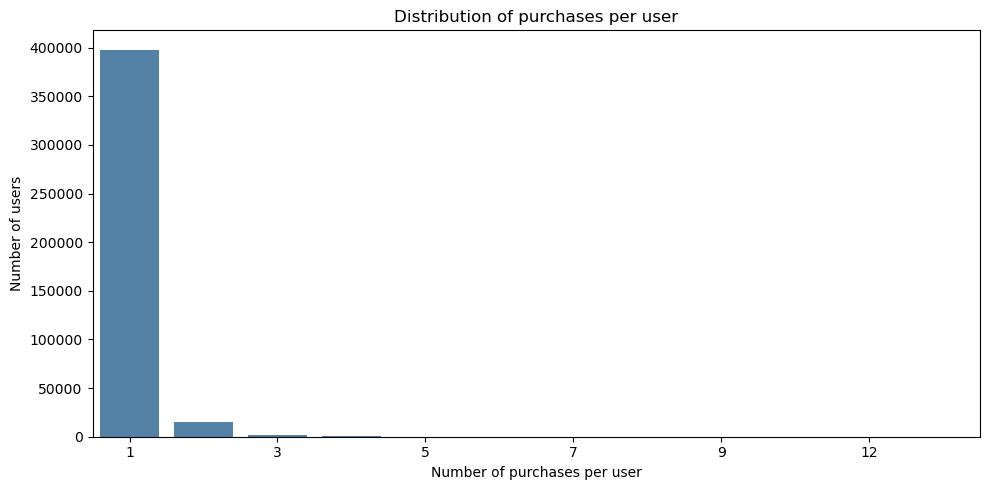

In [14]:
# 1) Count purchases per user (value = number of purchases for that user)
purchase_counts = df['user_id'].value_counts()
# 2) Compute the distribution: index = number of purchases, values = how many users have that count
count_distribution = purchase_counts.value_counts().sort_index()
# Show the first few items (purchase count -> number of users)
print(count_distribution.head(20))
# 3) Plot bar chart with linear y-axis
import matplotlib.ticker as ticker
plt.figure(figsize=(10,5))
sns.barplot(x=count_distribution.index, y=count_distribution.values, color='steelblue')
plt.xlabel('Number of purchases per user')
plt.ylabel('Number of users')
plt.title('Distribution of purchases per user')
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()

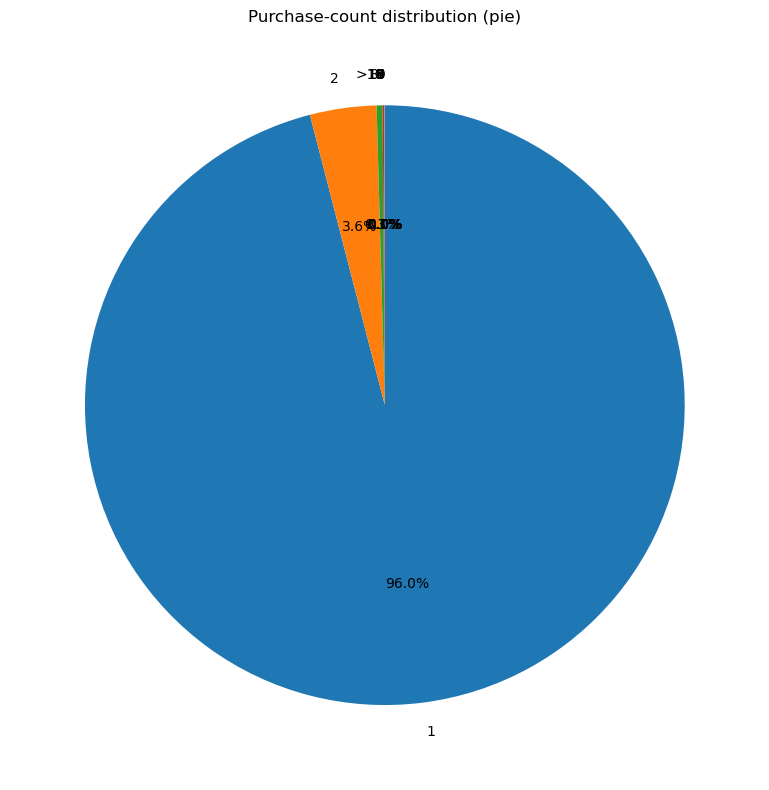

In [15]:
# Pie chart of purchase-count distribution
# Group rare large counts into a single bucket for clearer pie chart if needed
max_label = 10
dist = count_distribution.copy()
if len(dist) > max_label:
    large_sum = dist[dist.index > max_label].sum()
    dist = dist[dist.index <= max_label].copy()
    dist[f">{max_label}"] = large_sum
# Plot pie chart
plt.figure(figsize=(8,8))
dist.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False)
plt.ylabel('')
plt.title('Purchase-count distribution (pie)')
plt.tight_layout()

Total unique users: 414497
Users with >1 purchase: 16664

Top of distribution (purchase_count -> number_of_users):
count
2     14852
3      1316
4       360
5        68
6        33
7        17
8         6
9         7
10        3
12        1
13        1
Name: count, dtype: int64


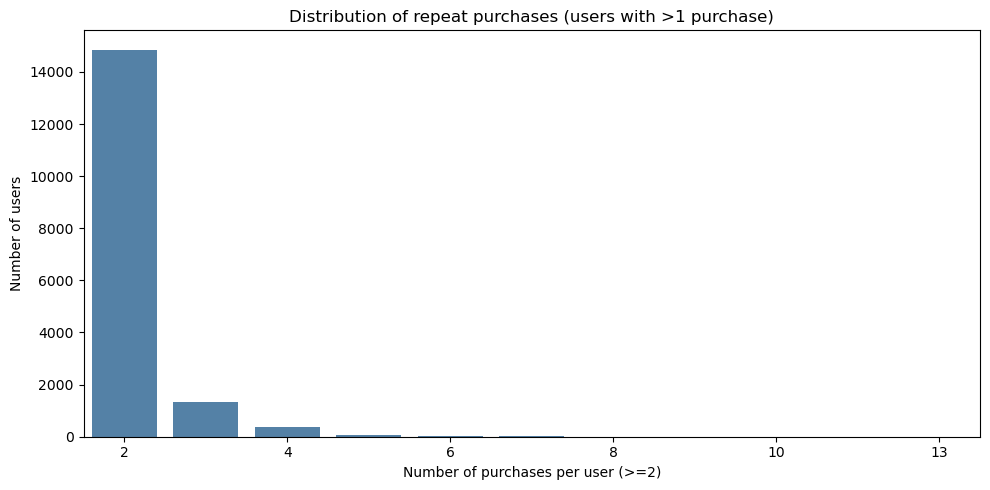

In [16]:
# New cell: plot distribution for users with >1 purchase
purchase_counts = df['user_id'].value_counts()
# keep only users with more than one purchase
purchase_counts_no1 = purchase_counts[purchase_counts > 1]
# distribution: purchase_count -> number of users (for users with >=2 purchases)
count_distribution_no1 = purchase_counts_no1.value_counts().sort_index()
# summary
print(f"Total unique users: {purchase_counts.shape[0]}")
print(f"Users with >1 purchase: {purchase_counts_no1.shape[0]}")
print('\nTop of distribution (purchase_count -> number_of_users):')
print(count_distribution_no1.head(20))
# plot
import matplotlib.ticker as ticker
plt.figure(figsize=(10,5))
sns.barplot(x=count_distribution_no1.index, y=count_distribution_no1.values, color='steelblue')
plt.xlabel('Number of purchases per user (>=2)')
plt.ylabel('Number of users')
plt.title('Distribution of repeat purchases (users with >1 purchase)')
plt.xticks(rotation=0)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.tight_layout()

In [17]:
# Compute binned repeat-purchase distribution and show table
purchase_counts = df['user_id'].value_counts()
total_users = purchase_counts.shape[0]
# helper to assign bins
def purchase_bin(n):
    if n == 1:
        return '1'
    elif n == 2:
        return '2'
    elif 3 <= n <= 5:
        return '3-5'
    elif 6 <= n <= 10:
        return '6-10'
    else:
        return '>10'
# map counts to bins and aggregate
bins = purchase_counts.map(purchase_bin)
order = ['1','2','3-5','6-10','>10']
bin_counts = bins.value_counts().reindex(order).fillna(0).astype(int)
# build result table
result = pd.DataFrame({
    'purchase_bin': bin_counts.index,
    'num_users': bin_counts.values,
})
result['pct_of_total_users'] = (result['num_users'] / total_users * 100).round(2)
# overall repeat-rate (users with >1 purchase)
repeat_users = purchase_counts[purchase_counts > 1].shape[0]
repeat_rate_pct = round(repeat_users / total_users * 100, 2)
print(f"Total unique users: {total_users}")
print(f"Users with >1 purchase: {repeat_users} ({repeat_rate_pct}%)\n")
display(result)
# also print as plain table for clarity
print(result.to_string(index=False))

Total unique users: 414497
Users with >1 purchase: 16664 (4.02%)



,purchase_bin,num_users,pct_of_total_users
0,1,397833,95.98
1,2,14852,3.58
2,3-5,1744,0.42
3,6-10,66,0.02
4,>10,2,0.00


purchase_bin  num_users  pct_of_total_users
           1     397833               95.98
           2      14852                3.58
         3-5       1744                0.42
        6-10         66                0.02
         >10          2                0.00
